In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#parameters for Real NOK 70-30
r_0 = 0.0632
a_1 = -0.0375
a_2 = 1.1923
a_3 = -0.5069
b_1 = 1.0827
b_2 = -0.2950


std_r = 0.1389
std_x = 0.0171
std_f = 0.0218
cov_xf = 0.000148

r_mean = 0.03
mu = np.log(1+r_mean)

cov_e = [[std_r**2, 0, 0],
        [0, std_x**2, cov_xf],
        [0, cov_xf, std_f**2]]


In [3]:
#simulation

#generate errors
sample_size = 1000000
T = 40 #years
e = np.random.multivariate_normal([0,0,0], cov_e, (T, sample_size))

#
r = np.zeros((T, sample_size))
X = np.zeros((T, sample_size))
F = r = np.zeros((T, sample_size))

In [4]:
e.shape

(40, 1000000, 3)

In [5]:
#simulate the VAR
r = np.zeros((T, sample_size))
X = np.zeros((T, sample_size))
F = np.zeros((T, sample_size))

#first simulate r because it is independent
r = mu -.5*std_r**2 + e[:,:,0]# squared std even though it's not squared in specification
#then simulate X and F
#note that the first couple of values are taken from end of arrays
for t in range(T):
    X[t] = a_1*r[t-1] + a_2*X[t-1] + a_3*X[t-2] + e[t,:,1]
    F[t] = b_1*F[t-1] + b_2*F[t-2] + e[t,:,2]

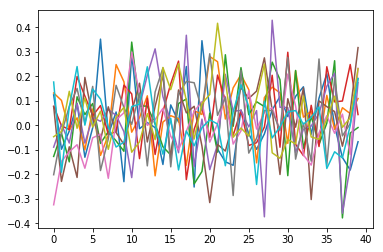

In [6]:
plt.plot(r[:,:10])

In [7]:
lambda_ = .5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.where(S[t-1]<=r_mean*A[t-1], r_mean*A[t]+F[t], lambda_*S[t-1]+(1-lambda_)*r_mean*A[t]+F[t])  #np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t]
    
    

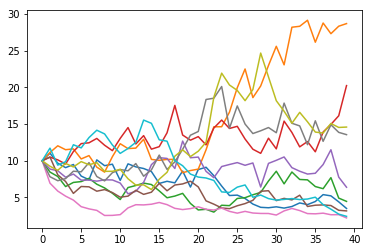

In [8]:
plt.plot(A[:,:10])

C:\Users\haakonat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


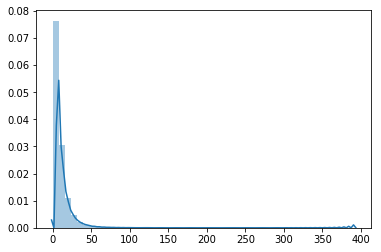

In [9]:
sns.distplot(A[-1,:])

In [10]:
des = pd.DataFrame(A[-1]).describe().T
des['depletion rate'] = (A[-1]==0).mean()

In [11]:
des.T

,0
count,1000000.000000
mean,9.475957
std,11.147825
min,0.000000
25%,3.123657
50%,6.155471
75%,11.742895
max,392.043353
depletion rate,0.007013


In [12]:
df = pd.DataFrame(index = ['5%', '25%', '50%', '75%', '95%', 'Mean','Depletion rate'])

In [13]:
lambda_ = 0
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] #+ X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.where(S[t-1]<=r_mean*A[t-1], r_mean*A[t], lambda_*S[t-1]+(1-lambda_)*r_mean*A[t])  #np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t]
    
df[r'$\lambda$=0, X=0,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [14]:
lambda_ = .5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] #+ X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)
    
    S[t] = np.where(S[t-1]<=r_mean*A[t-1], r_mean*A[t], lambda_*S[t-1]+(1-lambda_)*r_mean*A[t])  
    D[t] = S[t]
    
df[r'$\lambda$=0.5, X=0,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [15]:
lambda_ = 0
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] 
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)
    
    S[t] = np.where(S[t-1]<=r_mean*A[t-1], r_mean*A[t], lambda_*S[t-1]+(1-lambda_)*r_mean*A[t]) 
    D[t] = S[t] + X[t]
    
df[r'$\lambda$=0,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [16]:
lambda_ = 0.5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] 
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)
    
    S[t] = np.where(S[t-1]<=r_mean*A[t-1], r_mean*A[t], lambda_*S[t-1]+(1-lambda_)*r_mean*A[t]) 
    D[t] = S[t] + X[t]
    
df[r'$\lambda$=0.5,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [17]:
lambda_ = 0
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)
    
    S[t] = np.where(S[t-1]<=r_mean*A[t-1], r_mean*A[t]+F[t], lambda_*S[t-1]+(1-lambda_)*r_mean*A[t]+F[t]) 
    D[t] = S[t] + X[t]
    
df[r'$\lambda$=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [18]:
lambda_ = 0.5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)
    
    S[t] = np.where(S[t-1]<=r_mean*A[t-1], r_mean*A[t]+F[t], lambda_*S[t-1]+(1-lambda_)*r_mean*A[t]+F[t]) 
    D[t] = S[t] + X[t]
    
df[r'$\lambda$=0.5'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [19]:
lambda_ = .8
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)
    
    S[t] = np.where(S[t-1]<=r_mean*A[t-1], r_mean*A[t]+F[t], lambda_*S[t-1]+(1-lambda_)*r_mean*A[t]+F[t]) 
    D[t] = S[t] + X[t]
    
df[r'$\lambda$=0.8'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [20]:
df

,"$\lambda$=0, X=0,F=0","$\lambda$=0.5, X=0,F=0","$\lambda$=0,F=0","$\lambda$=0.5,F=0",$\lambda$=0,$\lambda$=0.5,$\lambda$=0.8
5%,1.538869,1.538869,1.467584,1.467584,1.393163,0.920446,0.000000
25%,3.672112,3.672112,3.658054,3.658054,3.638449,3.123657,1.799576
50%,6.700644,6.700644,6.748041,6.748041,6.754371,6.155471,4.742187
75%,12.273043,12.273043,12.416886,12.416886,12.443957,11.742895,10.148623
95%,29.119795,29.119795,29.520291,29.520291,29.588436,28.775430,26.948008
Mean,9.993987,9.993987,10.085923,10.085923,10.085886,9.475957,8.047728
Depletion rate,0.000000,0.000000,0.000068,0.000068,0.000964,0.007013,0.067992


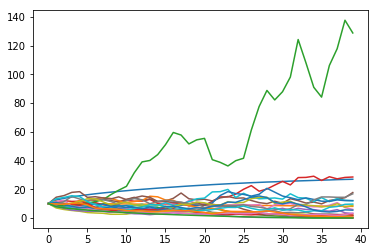

In [21]:
plt.plot(np.percentile(A,95,axis=1))
plt.plot(A.mean(axis=1))
plt.plot(A[:,:20])
plt.plot(np.percentile(A,5, axis=1))